## Day 24 Lecture 1 Assignment

In this assignment, we will build our first logistic regression model on numeric data. We will use the FIFA soccer ratings dataset loaded below and analyze the model generated for this dataset.

In [1]:
import numpy as np
import pandas as pd

import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Import the [FIFA Soccer Ratings dataset](https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/fifa_ratings.csv).

In [3]:
fifa = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/fifa_ratings.csv')

### Create an Elite field that contains a 1 if the value in the Overall field is >= 75, otherwise 0.

Our response for our logistic regression model is going to be a binary label, "Elite" or "Not Elite", corresponding to whether or not the player has an overall rating greater than or equal to 75. This corresponds to the top 10% or so of soccer players in the data set. Create the response column.

In [5]:
fifa['elite'] = fifa['Overall'] >= 75 
fifa['elite'] = pd.get_dummies(fifa['elite'], drop_first=True)

### Address potential collinearity issues by removing the appropriate features. 

There is no universally agreed upon technique for doing so, so feel free to use any reasonable method. We have provided the convenience function *remove_correlated_features* as one way of doing so, and we use a threshold of 0.9 for that function to reduce correlation among features.

In [6]:
def remove_correlated_features(dataset, threshold=0.9):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
                if colname in dataset.columns:
                    print(f'Deleted {colname} from dataset.')
                    del dataset[colname]

    return dataset

In [8]:
fifa.head()

,ID,Name,Overall,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,elite
0,158023,L. Messi,94,84,95,70,90,86,97,93,94,87,96,91,86,91,95,95,85,68,72,59,94,48,22,94,94,75,96,33,28,26,1
1,20801,Cristiano Ronaldo,94,84,94,89,81,87,88,81,76,77,94,89,91,87,96,70,95,95,88,79,93,63,29,95,82,85,95,28,31,23,1
2,190871,Neymar Jr,92,79,87,62,84,84,96,88,87,78,95,94,90,96,94,84,80,61,81,49,82,56,36,89,87,81,94,27,24,33,1
3,192985,K. De Bruyne,91,93,82,55,92,82,86,85,83,91,91,78,76,79,91,77,91,63,90,75,91,76,61,87,94,79,88,68,58,51,1
4,183277,E. Hazard,91,81,84,61,89,80,95,83,79,83,94,94,88,95,90,94,82,56,83,66,80,54,41,87,89,86,91,34,27,22,1


### Split the data into train and test, with 80% training and 20% testing. 

Be sure to leave out columns that would not make sense in the model, like the player ID column.

In [9]:
from sklearn.model_selection import train_test_split
X = fifa.drop(['ID','Name', 'Overall', 'elite'], axis=1)
y = fifa['elite']

X_train, X_test, y_train, y_test = train_test_split(
         X, y, test_size=0.20)

### Fit the logistic regression model using the statsmodels package and print out the coefficient summary. 

Which variables appear to be the most important, and what effect do they have on the probability of a player being elite?

In [10]:
import statsmodels.api as sm
X_train_const = sm.add_constant(X_train)
sm_model = sm.Logit(y_train, X_train_const).fit()
print(sm_model.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/discrete/discrete_model.py:1736: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/usr/local/lib/python3.6/dist-packages/statsmodels/discrete/discrete_model.py:1789: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Optimization terminated successfully.
         Current function value: inf
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                  elite   No. Observations:                12897
Model:                          Logit   Df Residuals:                    12867
Method:                           MLE   Df Model:                           29
Date:                Thu, 15 Oct 2020   Pseudo R-squ.:                     inf
Time:                        15:44:30   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -60.0430      1.836    -32.702      0.000     -63.642     -56.444
Crossing          

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


### Fit the logistic regression model using the Scikit-Learn package and compute the accuracy score. 

We have yet to discuss how to evaluate the model, which will happen next week, but one intuitive way to see if our model predictions are reasonable is to compute the accuracy score.

In [12]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression(max_iter=1000)
logit.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [53]:
logit.score(X_train, y_train)

0.9567341242149338

In [54]:
logit.score(X_test, y_test)

0.9562790697674418

### Generate predicted probabilities on the test set by calling the `predict_proba` method.

In [55]:
elite_prob = logit.predict_proba(X_test)

In [56]:
elite_prob = pd.DataFrame(elite_prob, columns=['Elite', 'Not Elite'])

### Generate a violin plot that shows the distribution of predicted probabilities by actual class (Elite field).

What insights can you draw from the visualization?

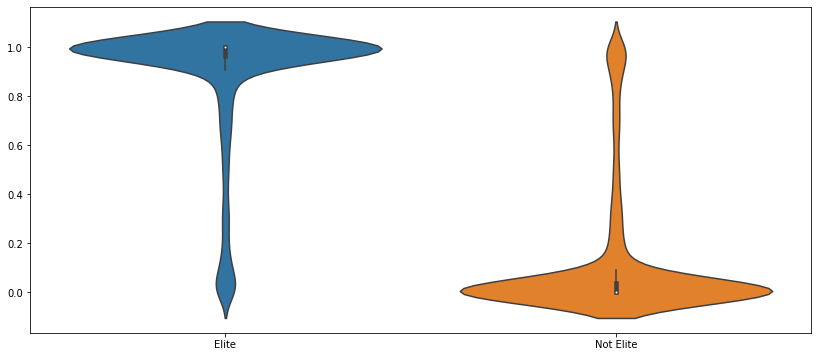

In [57]:
plt.figure(figsize=(14,6))
sns.violinplot(data = elite_prob)
plt.show()